In [1]:
import os
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBRegressor

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'] )

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
df['Species']  = pd.Categorical.from_codes(iris.target, iris.target_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


###### Checking for missing values

In [9]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
Species              0
dtype: int64

In [10]:
#Checking class imbalance 
print(df['Species'].value_counts())


print("Data for all three species is equal")

virginica     50
versicolor    50
setosa        50
Name: Species, dtype: int64
Data for all three species is equal


#### Visualizations / Insights

Text(0.5,1,'SepalLength vs SepalWidth')

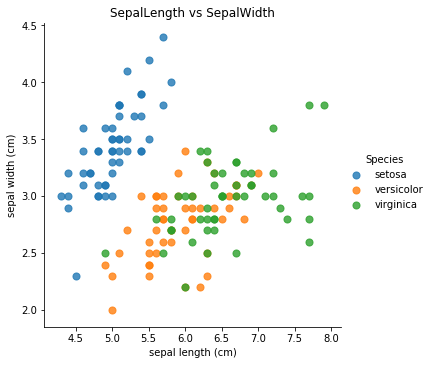

In [11]:
sns.lmplot('sepal length (cm)', 'sepal width (cm)',
           data=df,
           fit_reg=False,
           hue="Species",
           scatter_kws={"marker": "D",
                        "s": 50})
plt.title('SepalLength vs SepalWidth')

Text(0.5,1,'Petal Length  vs Petal Width ')

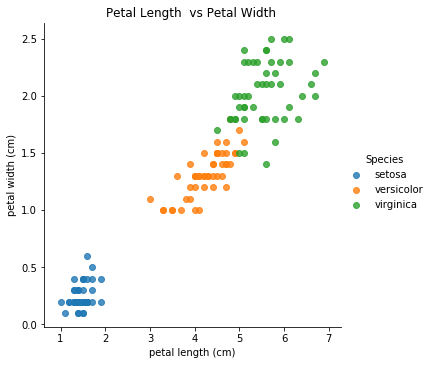

In [12]:
sns.lmplot('petal length (cm)', 'petal width (cm)',
           data=df,
           fit_reg=False,
           hue="Species")
           
plt.title('Petal Length  vs Petal Width ')

##### Creating train and test datasets

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [14]:
X = df.drop(['target', 'Species'], axis = 1)
Y = df['target']

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

#### 1. KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
preds = knn.predict(X_test)

In [19]:
preds

array([1., 2., 0., 1., 2., 2., 0., 2., 0., 1., 0., 0., 1., 2., 0., 1., 2.,
       1., 0., 1., 0., 1., 1., 2., 1., 2., 2., 0., 0., 2., 1., 2., 0., 1.,
       0., 0., 2., 2.])

In [20]:
print("Train Accuracy", knn.score(X_train, y_train))

print("Test Accuracy", knn.score(X_test, y_test))

Train Accuracy 0.9732142857142857
Test Accuracy 0.9473684210526315


In [21]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : [3, 5, 7, 10], 
          'metric': ['euclidean', 'manhattan'] }

Grid_Knn = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid= params, 
                        cv  = 3,
                        n_jobs = -1,
                        verbose = 1)

Grid_Knn_results = Grid_Knn.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.6s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
Grid_Knn_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

In [23]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(preds, y_test))
print(confusion_matrix(preds, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.92      0.92      0.92        12
         2.0       0.92      0.92      0.92        13

   micro avg       0.95      0.95      0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

[[13  0  0]
 [ 0 11  1]
 [ 0  1 12]]


### Random Forest

In [24]:
X = df.drop(['target', 'Species'], axis = 1)
Y = df['target']

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
preds_rf = rf.predict(X_test)

In [28]:
preds_rf

array([0., 0., 1., 0., 1., 1., 0., 2., 0., 0., 0., 2., 2., 1., 1., 1., 1.,
       2., 0., 2., 0., 1., 1., 0., 2., 0., 0., 1., 2., 2., 1., 2., 0., 1.,
       1., 2., 2., 1.])

In [29]:
print("Random Forest Classification Report \n", classification_report(y_test, preds_rf))
print("Random Forest Confusion Matrix \n", confusion_matrix(y_test, preds_rf))
print("Accuracy \n", accuracy_score(y_test, preds_rf))

Random Forest Classification Report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      0.93      0.97        15
         2.0       0.91      1.00      0.95        10

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

Random Forest Confusion Matrix 
 [[13  0  0]
 [ 0 14  1]
 [ 0  0 10]]
Accuracy 
 0.9736842105263158


##### Grid Search Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
from sklearn.model_selection import GridSearchCV

rf_params = ({'n_estimators'  : [10, 30, 60, 100],
             'max_features' : ['auto', 'sqrt'], 
             'max_depth' : [5, 10, 15, 20], 
             'min_samples_split' : [2, 5, 10], 
             'min_samples_leaf' : [1, 2, 4], 
             'bootstrap' : ['True', 'False']}
            )

In [32]:
rf_GridCV = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=rf_params, 
                         scoring = 'accuracy',
                         n_jobs = -1, 
                         cv = 5, 
                         verbose = 10)

In [33]:
rf_GridCV.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1449s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 300 tas

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 30, 60, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': ['True', 'False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=10)

In [34]:
rf_GridCV.best_score_

0.9732142857142857

### Neural Networks

##### Preparing the Data

###### 1. Data Scaling

In [35]:
X = df.drop(['target', 'Species'], axis = 1)
Y = df['target']

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [37]:
from keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
labelencoder_y = LabelEncoder()
Y = to_categorical(Y)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_array = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)

X_test_array = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


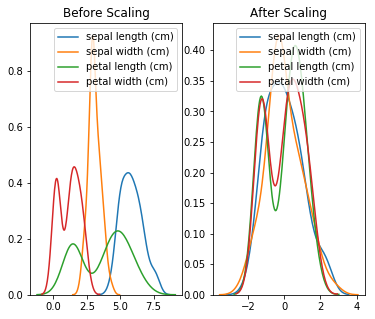

In [41]:
# Before & After mean normalization
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

#sns.kdeplot for univariate density
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['sepal length (cm)'], ax=ax1)
sns.kdeplot(X_train['sepal width (cm)'], ax=ax1)
sns.kdeplot(X_train['petal length (cm)'], ax=ax1)
sns.kdeplot(X_train['petal width (cm)'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['sepal length (cm)'], ax=ax2)
sns.kdeplot(X_train_scaled['sepal width (cm)'], ax=ax2)
sns.kdeplot(X_train_scaled['petal length (cm)'], ax=ax2)
sns.kdeplot(X_train_scaled['petal width (cm)'], ax=ax2)

plt.show()

In [42]:
from keras.models import Sequential
from keras.layers import Dense

In [43]:
#Defining the model
model = Sequential()
model.add(Dense(12, input_dim = X_train_scaled.shape[1], activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [45]:
model.fit(X_train_scaled, y_train, epochs = 500, batch_size= 4)

Epoch 1/500
112/112 [==============================] - 0s 4ms/step - loss: 1.0683 - acc: 0.4911 
Epoch 2/500
112/112 [==============================] - 0s 366us/step - loss: 0.9852 - acc: 0.6696
Epoch 3/500
112/112 [==============================] - 0s 437us/step - loss: 0.8981 - acc: 0.6786
Epoch 4/500
112/112 [==============================] - 0s 402us/step - loss: 0.8119 - acc: 0.6964
Epoch 5/500
112/112 [==============================] - 0s 393us/step - loss: 0.7246 - acc: 0.7321
Epoch 6/500
112/112 [==============================] - 0s 544us/step - loss: 0.6441 - acc: 0.7500
Epoch 7/500
112/112 [==============================] - 0s 402us/step - loss: 0.5721 - acc: 0.7946
Epoch 8/500
112/112 [==============================] - 0s 410us/step - loss: 0.5131 - acc: 0.8304
Epoch 9/500
112/112 [==============================] - 0s 419us/step - loss: 0.4649 - acc: 0.8304
Epoch 10/500
112/112 [==============================] - 0s 357us/step - loss: 0.4268 - acc: 0.8304
Epoch 11/500
112/112

112/112 [==============================] - 0s 410us/step - loss: 0.0420 - acc: 0.9911
Epoch 84/500
112/112 [==============================] - 0s 410us/step - loss: 0.0414 - acc: 1.0000
Epoch 85/500
112/112 [==============================] - 0s 446us/step - loss: 0.0421 - acc: 0.9911
Epoch 86/500
112/112 [==============================] - 0s 544us/step - loss: 0.0388 - acc: 1.0000
Epoch 87/500
112/112 [==============================] - 0s 526us/step - loss: 0.0392 - acc: 0.9911
Epoch 88/500
112/112 [==============================] - 0s 482us/step - loss: 0.0395 - acc: 0.9911
Epoch 89/500
112/112 [==============================] - 0s 535us/step - loss: 0.0398 - acc: 0.9911
Epoch 90/500
112/112 [==============================] - 0s 526us/step - loss: 0.0389 - acc: 0.9911
Epoch 91/500
112/112 [==============================] - 0s 598us/step - loss: 0.0384 - acc: 0.9911
Epoch 92/500
112/112 [==============================] - 0s 526us/step - loss: 0.0367 - acc: 0.9911
Epoch 93/500
112/112 [=

112/112 [==============================] - 0s 428us/step - loss: 0.0194 - acc: 1.0000
Epoch 166/500
112/112 [==============================] - 0s 357us/step - loss: 0.0191 - acc: 1.0000
Epoch 167/500
112/112 [==============================] - 0s 464us/step - loss: 0.0192 - acc: 1.0000
Epoch 168/500
112/112 [==============================] - 0s 366us/step - loss: 0.0195 - acc: 1.0000
Epoch 169/500
112/112 [==============================] - 0s 339us/step - loss: 0.0184 - acc: 1.0000
Epoch 170/500
112/112 [==============================] - 0s 312us/step - loss: 0.0192 - acc: 1.0000
Epoch 171/500
112/112 [==============================] - 0s 348us/step - loss: 0.0193 - acc: 1.0000
Epoch 172/500
112/112 [==============================] - 0s 339us/step - loss: 0.0215 - acc: 1.0000
Epoch 173/500
112/112 [==============================] - 0s 410us/step - loss: 0.0184 - acc: 1.0000
Epoch 174/500
112/112 [==============================] - 0s 366us/step - loss: 0.0186 - acc: 1.0000
Epoch 175/500


112/112 [==============================] - 0s 393us/step - loss: 0.0116 - acc: 1.0000
Epoch 247/500
112/112 [==============================] - 0s 366us/step - loss: 0.0106 - acc: 1.0000
Epoch 248/500
112/112 [==============================] - 0s 446us/step - loss: 0.0112 - acc: 1.0000
Epoch 249/500
112/112 [==============================] - 0s 366us/step - loss: 0.0111 - acc: 1.0000
Epoch 250/500
112/112 [==============================] - 0s 402us/step - loss: 0.0113 - acc: 1.0000
Epoch 251/500
112/112 [==============================] - 0s 464us/step - loss: 0.0099 - acc: 1.0000
Epoch 252/500
112/112 [==============================] - 0s 375us/step - loss: 0.0100 - acc: 1.0000
Epoch 253/500
112/112 [==============================] - 0s 428us/step - loss: 0.0103 - acc: 1.0000
Epoch 254/500
112/112 [==============================] - 0s 428us/step - loss: 0.0110 - acc: 1.0000
Epoch 255/500
112/112 [==============================] - 0s 402us/step - loss: 0.0109 - acc: 1.0000
Epoch 256/500


112/112 [==============================] - 0s 357us/step - loss: 0.0062 - acc: 1.0000
Epoch 329/500
112/112 [==============================] - 0s 455us/step - loss: 0.0072 - acc: 1.0000
Epoch 330/500
112/112 [==============================] - 0s 393us/step - loss: 0.0069 - acc: 1.0000
Epoch 331/500
112/112 [==============================] - 0s 375us/step - loss: 0.0053 - acc: 1.0000
Epoch 332/500
112/112 [==============================] - 0s 455us/step - loss: 0.0062 - acc: 1.0000
Epoch 333/500
112/112 [==============================] - 0s 402us/step - loss: 0.0062 - acc: 1.0000
Epoch 334/500
112/112 [==============================] - 0s 402us/step - loss: 0.0055 - acc: 1.0000
Epoch 335/500
112/112 [==============================] - 0s 348us/step - loss: 0.0054 - acc: 1.0000
Epoch 336/500
112/112 [==============================] - 0s 437us/step - loss: 0.0053 - acc: 1.0000
Epoch 337/500
112/112 [==============================] - 0s 375us/step - loss: 0.0058 - acc: 1.0000
Epoch 338/500


112/112 [==============================] - 0s 553us/step - loss: 0.0031 - acc: 1.0000
Epoch 411/500
112/112 [==============================] - 0s 393us/step - loss: 0.0036 - acc: 1.0000
Epoch 412/500
112/112 [==============================] - 0s 446us/step - loss: 0.0029 - acc: 1.0000
Epoch 413/500
112/112 [==============================] - 0s 526us/step - loss: 0.0031 - acc: 1.0000
Epoch 414/500
112/112 [==============================] - 0s 482us/step - loss: 0.0028 - acc: 1.0000
Epoch 415/500
112/112 [==============================] - 0s 455us/step - loss: 0.0027 - acc: 1.0000
Epoch 416/500
112/112 [==============================] - 0s 544us/step - loss: 0.0027 - acc: 1.0000
Epoch 417/500
112/112 [==============================] - 0s 455us/step - loss: 0.0030 - acc: 1.0000
Epoch 418/500
112/112 [==============================] - 0s 553us/step - loss: 0.0026 - acc: 1.0000
Epoch 419/500
112/112 [==============================] - 0s 518us/step - loss: 0.0028 - acc: 1.0000
Epoch 420/500


112/112 [==============================] - 0s 366us/step - loss: 0.0015 - acc: 1.0000
Epoch 492/500
112/112 [==============================] - 0s 357us/step - loss: 0.0014 - acc: 1.0000
Epoch 493/500
112/112 [==============================] - 0s 384us/step - loss: 0.0013 - acc: 1.0000
Epoch 494/500
112/112 [==============================] - 0s 428us/step - loss: 0.0014 - acc: 1.0000
Epoch 495/500
112/112 [==============================] - 0s 464us/step - loss: 0.0014 - acc: 1.0000
Epoch 496/500
112/112 [==============================] - 0s 446us/step - loss: 0.0016 - acc: 1.0000
Epoch 497/500
112/112 [==============================] - 0s 330us/step - loss: 0.0013 - acc: 1.0000
Epoch 498/500
112/112 [==============================] - 0s 410us/step - loss: 0.0012 - acc: 1.0000
Epoch 499/500
112/112 [==============================] - 0s 357us/step - loss: 0.0013 - acc: 1.0000
Epoch 500/500
112/112 [==============================] - 0s 330us/step - loss: 0.0014 - acc: 1.0000
